In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_path=r"C:/users/HP/Downloads/exam"
IMG_SIZE=(224,224)
BATCH_SIZE=32
SEED=42


In [4]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True)

full_valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size=len(full_valid_ds)-val_size

valid_ds=full_valid_ds.take(val_size)
test_ds=full_valid_ds.skip(val_size)

Found 1000 files belonging to 2 classes.
Using 700 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block (Increase filters)
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block (Increase filters further)
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Fourth Convolutional Block (More filters)
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(512, activation="relu"),  # Increased neurons for better learning capacity
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")  # Final output for binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
model.summary()
    

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)             │ (None, 222, 222, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 111, 111, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (None, 109, 109, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 54, 54, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_6 (Conv2D)             │ (None, 52, 52, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 26, 26, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_7 (Conv2D)             │ (None, 24, 24, 256)   │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 12, 12, 256)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 36864)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 512)           │   18,874,880 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 128)           │       65,664 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 1)             │          129 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 19,329,089 (73.73 MB)

 Trainable params: 19,329,089 (73.73 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=7)

Epoch 1/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 979ms/step - accuracy: 0.4942 - loss: 101.0593 - val_accuracy: 0.5750 - val_loss: 0.6896
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 951ms/step - accuracy: 0.5323 - loss: 0.7151 - val_accuracy: 0.5437 - val_loss: 0.7214
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 908ms/step - accuracy: 0.5671 - loss: 0.7089 - val_accuracy: 0.5312 - val_loss: 0.7704
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 927ms/step - accuracy: 0.6120 - loss: 0.6328 - val_accuracy: 0.5437 - val_loss: 0.7569
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 972ms/step - accuracy: 0.6459 - loss: 0.7548 - val_accuracy: 0.5312 - val_loss: 0.8068
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 952ms/step - accuracy: 0.7330 - loss: 0.6060 - val_accuracy: 0.5125 - val_loss: 1.3152
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 969ms/step - accuracy: 0.7094 - loss: 0.5236 - val_accuracy: 0.5188 - val_loss: 1.0061


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4186362022883259e-05..4.0152935980586335e-05].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4739744074176997e-05..9.518785191175994e-06].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.936540320457425e-05..2.694434988370631e-05].


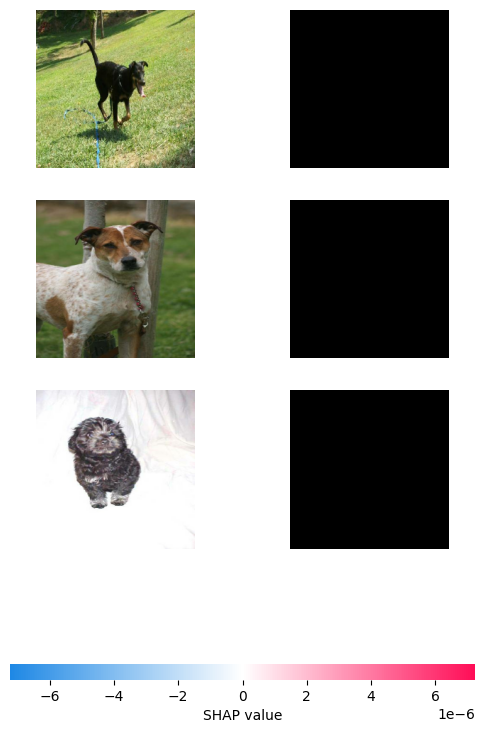

In [56]:
import numpy as np
import shap
for images,labels in train_ds.take(1):
    background = images[:10]  # background data for SHAP
    test_images = images[10:13]
    break
background_np = background.numpy().astype(np.float32) / 255.0
# Assuming `test_images` is a tensor as well
test_images_np = test_images.numpy().astype(np.float32) / 255.0

explainer=shap.GradientExplainer(model, background_np)

shap_values=explainer.shap_values(test_images_np)

shap.image_plot(shap_values, test_images_np)